In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import linearmodels.iv.model as lm
from scipy import stats
from itertools import combinations

In [111]:
df = pd.read_csv("Data-GP1-1(updated).csv")
df

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Date,Month,Year,Stormy,Mixed,p,q,Rainy,Cold,Wind
0,1,0,0,0,0,0,0,2,12,91,1,0,-0.430783,8.994421,1,0,2.995732
1,0,1,0,0,0,0,0,3,12,91,1,0,0.000000,7.707063,0,0,2.995732
2,0,0,1,0,0,0,0,4,12,91,0,1,0.072321,8.350194,1,1,2.813411
3,0,0,0,1,0,0,0,5,12,91,1,0,0.247139,8.656955,0,1,3.036554
4,0,0,0,0,1,0,0,6,12,91,1,0,0.664327,7.844241,0,1,3.036554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,0,0,0,0,0,0,4,5,92,0,0,-0.798508,8.610683,0,0,2.862201
107,0,1,0,0,0,0,0,5,5,92,0,1,-0.087011,7.162397,0,0,2.908721
108,0,0,1,0,0,0,0,6,5,92,0,1,0.184922,7.362010,0,0,2.862201
109,0,0,0,1,0,0,0,7,5,92,0,1,0.223143,8.764053,0,0,2.813411


# Data Exploration

To estimate the demand function of fish by using the data we acquired from cleaning "Data-GP1.csv", let us consider the following structural equation.

**_q_** = β$_0$ + β$_1$**_p_** + ε


**_q_** and **_p_** are likely endogenous vairbales as these are the variables that we would like to estimate. For Instrument Variables (IVs), we look for variables in our dataset that are correlated with the endogenous variable but are not influenced by ε.

- **_Mon, Tue, Wed, Thu, Fri, Sat, Sun_**: These variables represent the days of the week. They could potentially be IVs if there is reason to believe that certain days of the week might affect fish prices or sales differently. 
- **_Date, Month, Year_**: These variables represent the date, month, and year of the data points.
- **_Stormy, Mixed, Rainy, Cold_**: These variables represent different weather conditions. They could potentially be IVs if there is reason to believe that weather conditions affect fish supply or demand and that this effect is not captured directly by fish prices or sales.
- **_Wind_**: It is another weather-related variable that could potentially by an IV if there is reason to believe that wind conditions affect fishing conditions and subsequently, fish prices or sales.

In [112]:
df.describe()

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Date,Month,Year,Stormy,Mixed,p,q,Rainy,Cold,Wind
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.0,111.0,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.189189,0.207207,0.189189,0.207207,0.207207,0.0,0.0,15.324324,4.432432,91.810811,0.288288,0.306306,-0.193681,8.523430,0.162162,0.504505,2.862695
std,0.393435,0.407143,0.393435,0.407143,0.407143,0.0,0.0,8.958655,3.843818,0.393435,0.455020,0.463049,0.381935,0.741672,0.370271,0.502247,0.208632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,91.000000,0.000000,0.000000,-1.107745,6.194406,0.000000,0.000000,2.456736
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,7.000000,2.000000,92.000000,0.000000,0.000000,-0.479651,8.147429,0.000000,0.000000,2.708050
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,15.000000,3.000000,92.000000,0.000000,0.000000,-0.206514,8.621193,0.000000,1.000000,2.862201
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,23.000000,4.000000,92.000000,1.000000,1.000000,0.163000,9.035391,0.000000,1.000000,2.995732
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,31.000000,12.000000,92.000000,1.000000,1.000000,0.664327,9.981374,1.000000,1.000000,3.401197


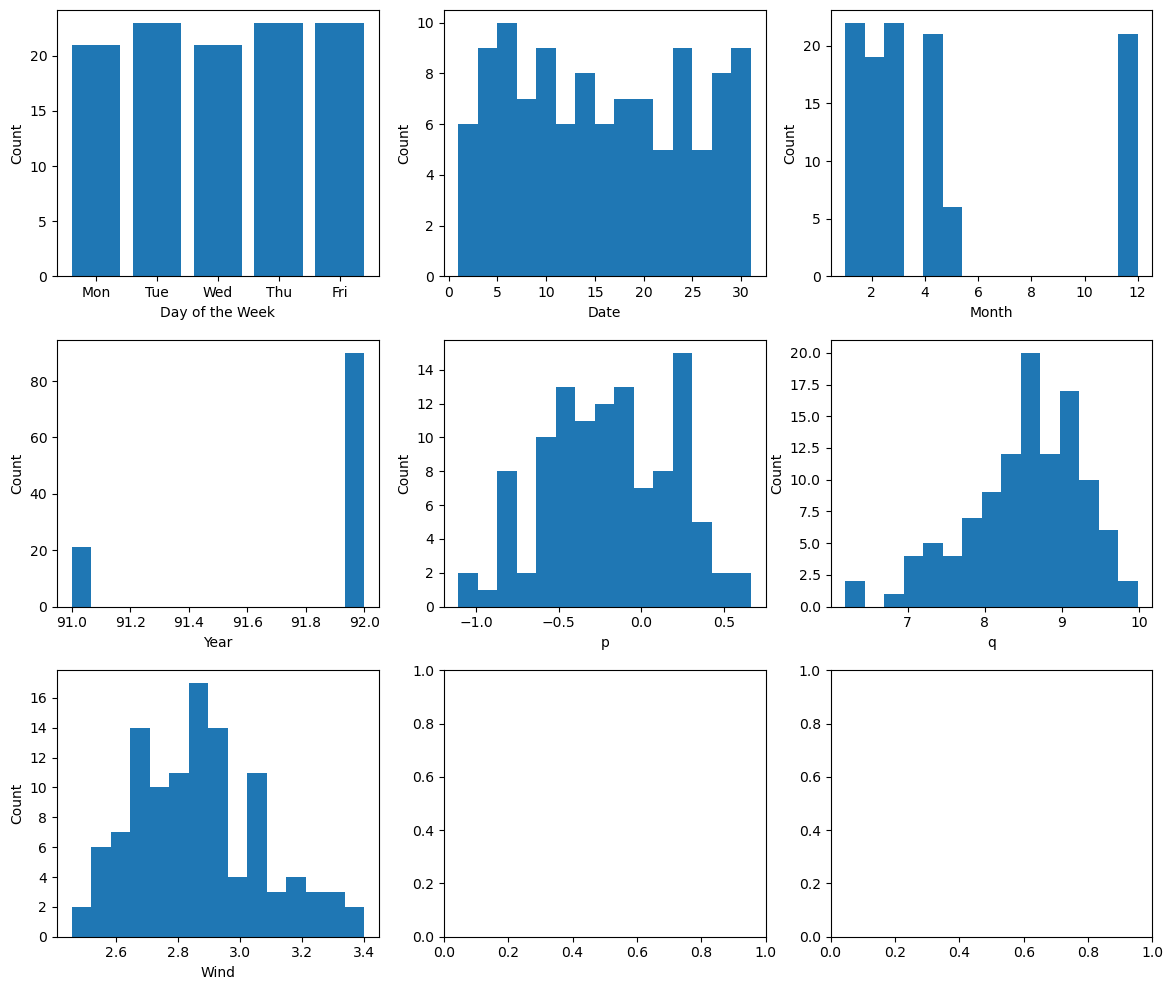

In [113]:
# Define the columns and titles for visualization
columns_to_visualize = [
    (["Mon", "Tue", "Wed", "Thu", "Fri"], 'Day of the Week'),
    ('Date', 'Date'),
    ('Month', 'Month'),
    ('Year', 'Year'),
    ('p', 'p'),
    ('q', 'q'),
    ('Wind', 'Wind')
]

# Create Figure with subplots
fig, axs = plt.subplots(3, 3, figsize=(12, 10))

# Loop through the columns and create subplots
for (column, xlabel), ax in zip(columns_to_visualize, axs.flat):
    if isinstance(column, list):
        data = df[column].sum()
        ax.bar(data.index, data.values)
    else:
        ax.hist(df[column], bins=15)

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()


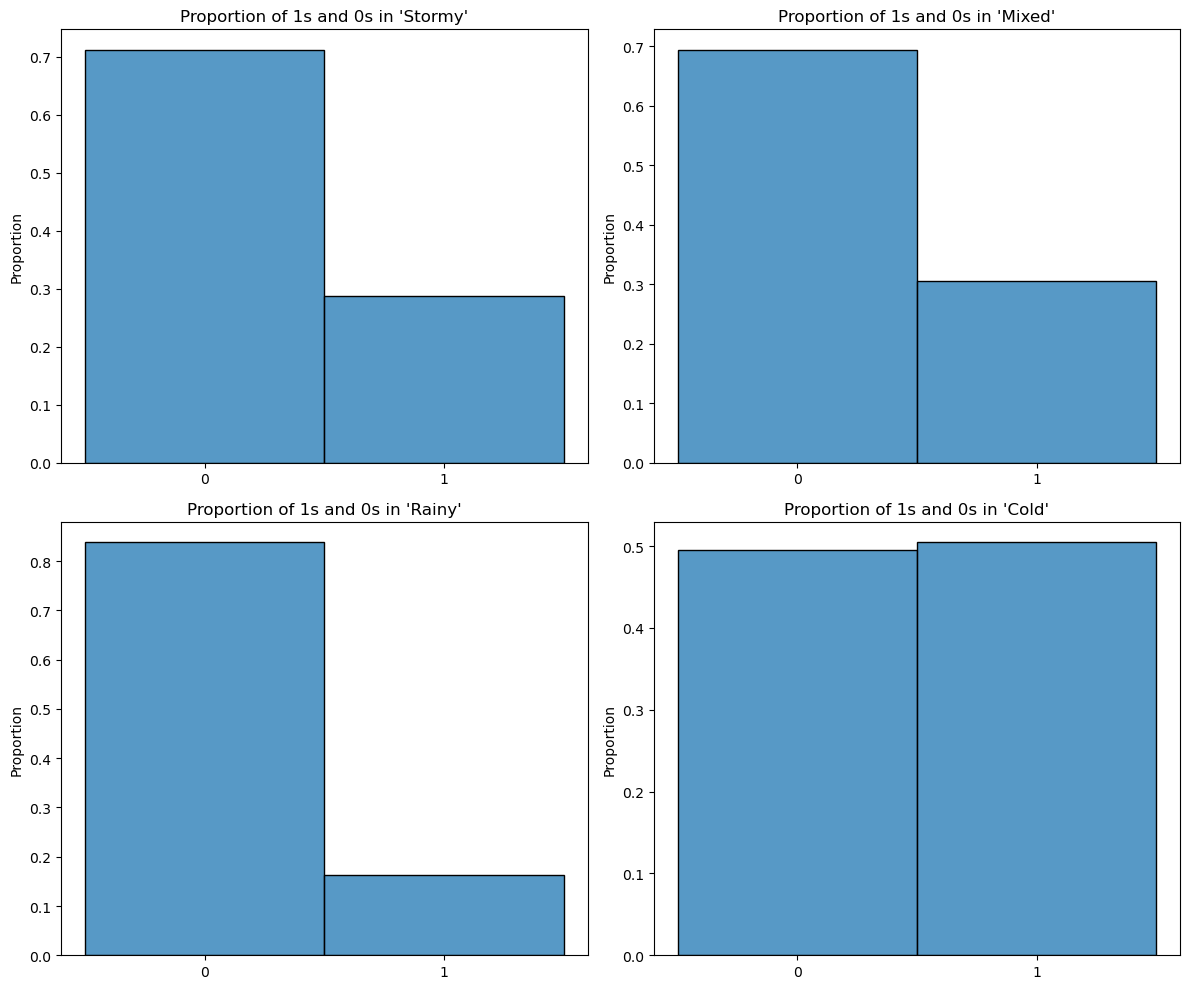

In [114]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Calculate and plot the proportion of 1s and 0s for each variable
variables = ["Stormy", "Mixed", "Rainy", "Cold"]

for i, variable in enumerate(variables):
    # Calculate the proportion of 1s and 0s
    proportion = df[variable].value_counts(normalize=True)
    
    # Plot the histogram in the corresponding subplot
    sns.histplot(data=proportion.reset_index(), x="index", weights=variable, stat="proportion", discrete=True, ax=axs[i // 2, i % 2])
    
    axs[i // 2, i % 2].set_xlabel("")
    axs[i // 2, i % 2].set_ylabel("Proportion")
    axs[i // 2, i % 2].set_title(f"Proportion of 1s and 0s in '{variable}'")
    axs[i // 2, i % 2].set_xticks([0, 1])
    axs[i // 2, i % 2].set_xticklabels(["0", "1"])

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

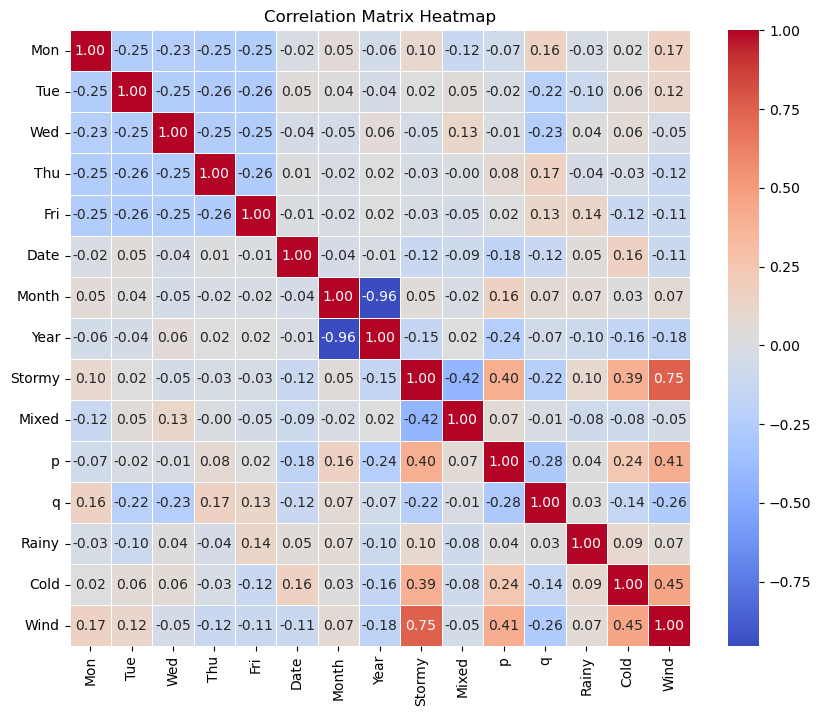

In [115]:
# Since Sat and Sun have no values, drop them
df.drop('Sat', axis=1, inplace=True)
df.drop('Sun', axis=1, inplace=True)

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

For our analysis, we deem:
- 0.8 - 1.0: Very strong correlation
- 0.6 - 0.79: Strong correlation
- 0.4 - 0.59: Moderate correlation
- 0.2 - 0.39: Weak correlation
- 0 - 0.19: Very weak correlation

# Identification of Instrument Variable

After analyzing the data distribution and correlation matrix, we've identified **_Wind_** as potential instrumental variables (IVs) for our analysis. Here's why:

- **Strong Correlation with Key Variables**: It showed a moderate correlations with our main variables of interest, **_p_** and **_q_**. These correlations suggests a plausible link that warrants further investigation

- **Diverse Range of Values**: The distribution of its values is wide, reflecting different wind speeds. This diversity in values enhances its suitability as IVs.

In economic terms, windy weather can impact fishing conditions and safety, potentially leading to a decrease in fish supply and affecting prices. Additionally, it may deter consumers from purchasing fish due to adverse weather conditions.

Therefore, considering their meaningful correlations, distribution characteristics, and economic significance, we have chosen these two variables as our instrumental variables for our forthcoming analysis.


# 2 Step Least Square Regression

In [126]:
def firstStageRegress(IVs, endo):
    X_stage1 = sm.add_constant(df[IVs])
    y_stage1 = df[endo]  # Endogenous variable

    # Fit the first-stage regression to find the predicted values of p
    results_stage1 = sm.OLS(y_stage1, X_stage1).fit()

    # Predict the values of educ using the first-stage regression model
    predictor = results_stage1.predict(X_stage1)

    return results_stage1, predictor  # Return p_hat

def secondStageRegress(predictor, endo, exo):
    df["phat"] = predictor
    
    # Stage 2: Use the predicted values of p
    X_stage2 = sm.add_constant(df[["phat"] + exo])
    y_stage2 = df[endo]  

    # Fit the second-stage regression model
    results_stage2 = sm.OLS(y_stage2, X_stage2).fit()
    
    return results_stage2

In [127]:
variables = ["Mon", "Tue", "Wed", "Thu","Fri", "Stormy", "Mixed", "Rainy", "Cold", "Wind"]

# Generate all possible combinations of the variables
combinations_list = []
    
for r in range(1, len(variables) + 1):
    combinations_list.extend(combinations(variables, r))

# Print the combinations as lists
for combination in combinations_list:
    combination_as_list = list(combination)


In [128]:
# Finding Potential IVs
sign_IVs = []
sign_phat = []

for combination in combinations_list:
    result, p_hat = firstStageRegress(list(combination), "p")
    
    if all(result.pvalues < 0.05):  # Check if all p-values are less than 0.05
        sign_IVs.append(list(combination))  # Append the combination as a list
        sign_phat.append(p_hat)
        
for combination in sign_IVs:
    print(combination)

['Stormy']
['Cold']
['Wind']
['Stormy', 'Mixed']
['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Wind']


In [129]:
# Finding suitable Exogeneous variables with respect to identified IVs
feasible_combis = []

for combination in combinations_list:
    for idx, predictor in enumerate(sign_phat):
        result = secondStageRegress(predictor, "q",list(combination))

        if all(result.pvalues < 0.05):  # Check if all p-values are less than 0.05
            sign_exo.append(list(combination))
            
            if all(item not in combination for item in sign_IVs[idx]):
                feasible_combis.append({
                    "IVs": sign_IVs[idx],
                    "Exo": list(combination)
                })
    
for combination in feasible_combis:
    print(combination)

print(f"Total Combination:{len(feasible_combis)}")


{'IVs': ['Wind'], 'Exo': ['Mon']}
{'IVs': ['Stormy'], 'Exo': ['Tue']}
{'IVs': ['Wind'], 'Exo': ['Tue']}
{'IVs': ['Stormy', 'Mixed'], 'Exo': ['Tue']}
{'IVs': ['Stormy'], 'Exo': ['Wed']}
{'IVs': ['Wind'], 'Exo': ['Wed']}
{'IVs': ['Stormy', 'Mixed'], 'Exo': ['Wed']}
{'IVs': ['Stormy'], 'Exo': ['Mon', 'Thu']}
{'IVs': ['Wind'], 'Exo': ['Mon', 'Thu']}
{'IVs': ['Stormy', 'Mixed'], 'Exo': ['Mon', 'Thu']}
{'IVs': ['Stormy'], 'Exo': ['Tue', 'Wed']}
{'IVs': ['Wind'], 'Exo': ['Tue', 'Wed']}
{'IVs': ['Stormy', 'Mixed'], 'Exo': ['Tue', 'Wed']}
{'IVs': ['Stormy'], 'Exo': ['Mon', 'Thu', 'Fri']}
{'IVs': ['Wind'], 'Exo': ['Mon', 'Thu', 'Fri']}
{'IVs': ['Stormy', 'Mixed'], 'Exo': ['Mon', 'Thu', 'Fri']}
{'IVs': ['Stormy'], 'Exo': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']}
{'IVs': ['Wind'], 'Exo': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']}
{'IVs': ['Stormy', 'Mixed'], 'Exo': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']}
Total Combination:19


With our IVs, we can now formulate our reduced equation to execute the first stage regression model.

**_p_** = 𝛿$_0$ + 𝛿$_1$ + 𝛿$_2$**_Stormy_** + 𝛿$_3$**_Mixed_** + _v_

In [125]:
# First Stage Regression
result, predictor = firstStageRegress(["Stormy","Mixed"],"p")
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      p   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     15.83
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           9.32e-07
Time:                        11:16:12   Log-Likelihood:                -35.891
No. Observations:                 111   AIC:                             77.78
Df Residuals:                     108   BIC:                             85.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3919      0.051     -7.756      0.0

In [131]:
# Second Stage Regression
result = secondStageRegress(predictor, "q",
                           ["Mon", "Tue", "Wed", "Thu", "Fri"])

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      q   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     5.304
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           0.000220
Time:                        11:19:19   Log-Likelihood:                -111.33
No. Observations:                 111   AIC:                             234.7
Df Residuals:                     105   BIC:                             250.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9190      0.083     83.804      0.0

# Hausman and Sargan Test

In [132]:
mlr2 = lm.IV2SLS(dependent=df["q"], 
                 exog=df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri']], 
                 endog=df["p"], 
                 instruments=df[['Stormy', 'Mixed']]).fit(cov_type="homoskedastic", debiased=True)

print(mlr2.wu_hausman(),"\n")
print(mlr2.sargan)

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 1.5975
P-value: 0.2091
Distributed: F(1,104) 

Sargan's test of overidentification
H0: The model is not overidentified.
Statistic: 0.7722
P-value: 0.3795
Distributed: chi2(1)
